In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import pickle
import numpy as np
import pickle
import tensorflow as tf


In [2]:


# charge les données BoW + SVD
def load_data(x_path='model/X_reduced.pkl', y_path='model/y.pkl'):
    with open(x_path, 'rb') as f:
        X = pickle.load(f)
    with open(y_path, 'rb') as f:
        y = pickle.load(f)
    return X, y

# charge les objets du modèle
def load_model_objects():
    # Charger les objets pour BoW + SVD
    with open('model/vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)
    with open('model/svd.pkl', 'rb') as f:
        svd = pickle.load(f)
    with open('model/top_tags.pkl', 'rb') as f:
        top_tags = pickle.load(f)
    
    # Charge les données Word2Vec
    with open('model/X_word2vec.pkl', 'rb') as f:
        X_word2vec = pickle.load(f)

    with open('model/X_use_embeddings.pkl', 'rb') as f:
        X_use_np = pickle.load(f)

    with open('model/y.pkl', 'rb') as f:
        y = pickle.load(f)

   

    # Charge les tags (y)
    with open('model/y.pkl', 'rb') as f:
        y = pickle.load(f)

    # Charge l'historique du modèle USE (pour voir les performances)
    with open('model/history_use.pkl', 'rb') as f:
        history_use = pickle.load(f)
    
    return vectorizer, svd, top_tags, X_word2vec, X_use_np, y, history_use

# Charge les données BoW + SVD
X, y = load_data()

# Charge les objets du modèle
vectorizer, svd, top_tags, X_word2vec, X_use_np, y, history_use = load_model_objects()

print("Données et modèles chargés avec succès.")


Données et modèles chargés avec succès.


In [3]:
# sépare x en part test et train
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


In [4]:

def transform_text_to_bow(text, vectorizer, svd):
    X_bow = vectorizer.transform([text])

    X_reduced = svd.transform(X_bow)

    return X_reduced

## Test avec BOW



In [5]:
# BoW + SVD

# Modèle pour BoW + SVD
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_bow_svd = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='sigmoid')
])

model_bow_svd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bow_svd = model_bow_svd.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Évaluation du modèle
loss_bow_svd, accuracy_bow_svd = model_bow_svd.evaluate(X_test, y_test)
print(f'BoW+SVD Model - Loss: {loss_bow_svd}, Accuracy: {accuracy_bow_svd}')


Epoch 1/10


c:\Users\leenc\Documents\openclassrooms\p5\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0222 - loss: 0.8400 - val_accuracy: 0.1233 - val_loss: 0.2195
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0722 - loss: 0.2844 - val_accuracy: 0.2149 - val_loss: 0.1837
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1243 - loss: 0.2255 - val_accuracy: 0.3145 - val_loss: 0.1627
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1691 - loss: 0.1988 - val_accuracy: 0.3235 - val_loss: 0.1513
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1987 - loss: 0.1786 - val_accuracy: 0.3326 - val_loss: 0.1432
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2022 - loss: 0.1638 - val_accuracy: 0.3507 - val_loss: 0.1370
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2397 - loss: 0.1590 - val_accuracy: 0.3495 - val_loss: 0.1326
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2385 - loss: 0.1475 - val_accuracy: 0.3688 - val_

## Word 2 vec

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0269 - loss: 0.4843 - val_accuracy: 0.2568 - val_loss: 0.1341
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1300 - loss: 0.1617 - val_accuracy: 0.2568 - val_loss: 0.1288
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1946 - loss: 0.1515 - val_accuracy: 0.2590 - val_loss: 0.1256
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2066 - loss: 0.1445 - val_accuracy: 0.2715 - val_loss: 0.1236
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2265 - loss: 0.1356 - val_accuracy: 0.2805 - val_loss: 0.1208
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2373 - loss: 0.1378 - val_accuracy: 0.2907 - val_loss: 0.1186
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2539 - loss: 0.1322 - val_accuracy: 0.3224 - val_loss: 0.1165
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2836 - loss: 0.1304 - val_accuracy: 0.

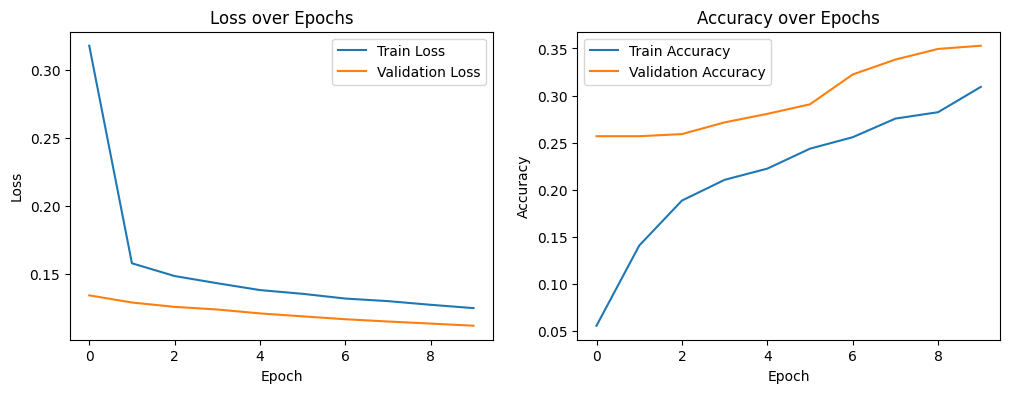

In [6]:
# Modèle pour Word2Vec
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

model_word2vec = Sequential([
    Dense(128, activation='relu', input_shape=(X_word2vec.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='sigmoid')
])

# Compile le modèle
model_word2vec.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])

# Défini un callback pour éviter le surajustement
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entraîne le modèle
history_word2vec = model_word2vec.fit(X_train, y_train,
                                      validation_data=(X_test, y_test),
                                      epochs=10,
                                      batch_size=32,
                                      callbacks=[early_stopping])

# Évalue le modèle
loss_word2vec, accuracy_word2vec = model_word2vec.evaluate(X_test, y_test)
print(f'Word2Vec Model - Loss: {loss_word2vec}, Accuracy: {accuracy_word2vec}')

# Trace les courbes de perte et d'accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_word2vec.history['loss'], label='Train Loss')
plt.plot(history_word2vec.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_word2vec.history['accuracy'], label='Train Accuracy')
plt.plot(history_word2vec.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.4955 - loss: 0.0870
USE Model - Loss: 0.08602501451969147, Accuracy: 0.5180995464324951


c:\Users\leenc\Documents\openclassrooms\p5\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Registered model 'UniversalSentenceEncoder' already exists. Creating a new version of this model...
Created version '39' of model 'UniversalSentenceEncoder'.
2024/08/16 20:46:01 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modèle USE chargé et enregistré avec succès.


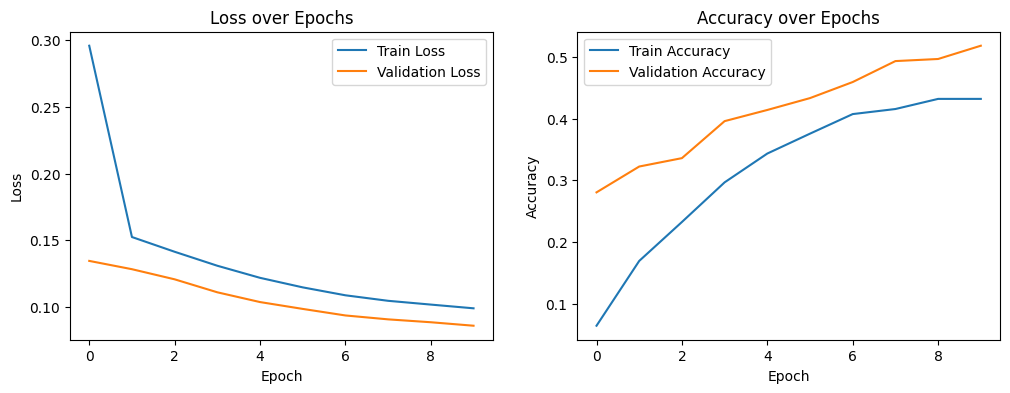

In [7]:
import tensorflow as tf
import mlflow
import mlflow.pyfunc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Charge les objets du modèle, y compris les embeddings USE
vectorizer, svd, top_tags, X_word2vec, X_use_np, y, history_use = load_model_objects()

# Charge USE sauvegardé en format .keras
saved_model_path = "saved_models/use_model.keras"
use_model = tf.keras.models.load_model(saved_model_path)

# Split des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_use_np, y, test_size=0.2, random_state=42)

# Évaluation du modèle USE
loss_use, accuracy_use = use_model.evaluate(X_test, y_test)
print(f'USE Model - Loss: {loss_use}, Accuracy: {accuracy_use}')

# Enregistre le modèle avec MLflow
with mlflow.start_run(run_name="USE Model Training", nested=True):
    mlflow.log_param("model_url", saved_model_path)

    # Classe qui encapsule le modèle pour compatibilité avec mlflow.pyfunc
    class USEModelWrapper(mlflow.pyfunc.PythonModel):
        def load_context(self, context):
            self.model = tf.keras.models.load_model(context.artifacts["use_model"])

        def predict(self, context, model_input):
            return self.model.predict(model_input)

    # Enregistrement du modèle avec mlflow.pyfunc.log_model
    mlflow.pyfunc.log_model(
        artifact_path="models/use_model",
        python_model=USEModelWrapper(),
        artifacts={"use_model": saved_model_path},
        registered_model_name="UniversalSentenceEncoder"
    )

mlflow.end_run()

print("Modèle USE chargé et enregistré avec succès.")

# Trace les courbes de perte et d'accuracy pour le modèle USE
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_use['loss'], label='Train Loss')
plt.plot(history_use['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_use['accuracy'], label='Train Accuracy')
plt.plot(history_use['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.show()


In [8]:
import mlflow
import tensorflow as tf

# les valeurs de perte et d'accuracy
print(f'BoW+SVD Model - Loss: {loss_bow_svd}, Accuracy: {accuracy_bow_svd}')
print(f'Word2Vec Model - Loss: {loss_word2vec}, Accuracy: {accuracy_word2vec}')
print(f'USE Model - Loss: {loss_use}, Accuracy: {accuracy_use}')

# Log du modèle BoW+SVD
with mlflow.start_run(run_name="BoW+SVD Model"):
    mlflow.log_metric("loss", loss_bow_svd)
    mlflow.log_metric("accuracy", accuracy_bow_svd)
    model_bow_svd_path = 'model/bow_svd_model.keras'
    model_bow_svd.save(model_bow_svd_path)
    mlflow.log_artifact(model_bow_svd_path)

# Log du modèle Word2Vec
with mlflow.start_run(run_name="Word2Vec Model"):
    mlflow.log_metric("loss", loss_word2vec)
    mlflow.log_metric("accuracy", accuracy_word2vec)
    model_word2vec_path = 'model/word2vec_model.keras'
    model_word2vec.save(model_word2vec_path)
    mlflow.log_artifact(model_word2vec_path)

# Log du modèle USE
with mlflow.start_run(run_name="USE Model"):
    mlflow.log_metric("loss", loss_use)
    mlflow.log_metric("accuracy", accuracy_use)
    model_use_path = 'model/use_model.keras'
    use_model.save(model_use_path)
    mlflow.log_artifact(model_use_path)


BoW+SVD Model - Loss: 0.12151180952787399, Accuracy: 0.3936651647090912
Word2Vec Model - Loss: 0.11169648170471191, Accuracy: 0.3529411852359772
USE Model - Loss: 0.08602501451969147, Accuracy: 0.5180995464324951


In [9]:
def build_model(input_shape, output_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(output_shape, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [10]:
def train_model(model, X_train, y_train, X_val, y_val, log_dir="logs/fit"):
    log_dir = log_dir + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    checkpoint_callback = ModelCheckpoint('model/best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback]
    )
    return history

In [11]:

def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Loss: {loss}, Accuracy: {accuracy}')
    return loss, accuracy

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')

    plt.show()

## Application des 3 différents modèles

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0193 - loss: 0.8740 - val_accuracy: 0.1278 - val_loss: 0.2194
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0626 - loss: 0.2858 - val_accuracy: 0.2851 - val_loss: 0.1794
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1200 - loss: 0.2227 - val_accuracy: 0.2998 - val_loss: 0.1640
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1513 - loss: 0.1934 - val_accuracy: 0.3201 - val_loss: 0.1509
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1685 - loss: 0.1801 - val_accuracy: 0.3292 - val_loss: 0.1434
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1914 - loss: 0.1669 - val_accuracy: 0.3473 - val_loss: 0.1368
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2194 - loss: 0.1602 - val_accuracy: 0.3552 - val_loss: 0.1313
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2380 - loss: 0.1489 - val_accuracy: 0.

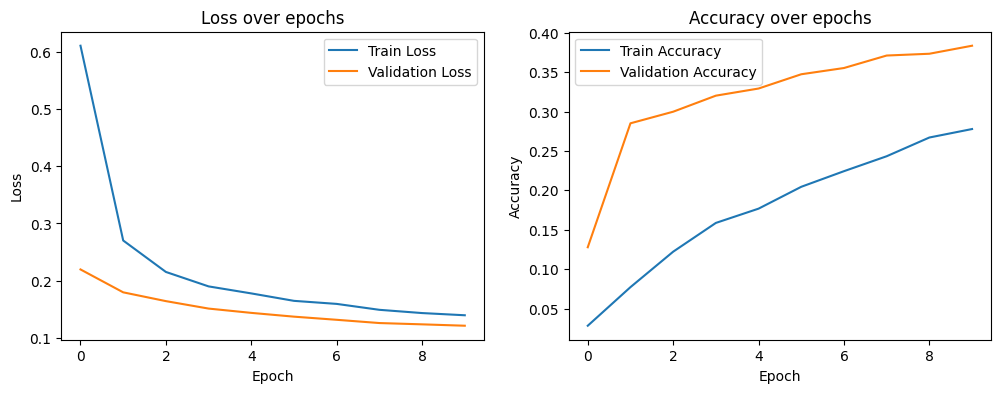

In [12]:
# Charge et entraîne le modèle BoW+SVD
X_train, X_test, y_train, y_test = split_data(X, y)
model_bow_svd = build_model(X_train.shape[1], y_train.shape[1])
history_bow_svd = train_model(model_bow_svd, X_train, y_train, X_test, y_test)
loss_bow_svd, accuracy_bow_svd = evaluate_model(model_bow_svd, X_test, y_test)
plot_training_history(history_bow_svd)

# Enregistre le modèle avec MLflow
with mlflow.start_run(run_name="BoW+SVD Model"):
    mlflow.log_param("model", "BoW+SVD")
    mlflow.log_metric("loss", loss_bow_svd)
    mlflow.log_metric("accuracy", accuracy_bow_svd)
    model_bow_svd_path = 'model/bow_svd_model.keras'
    model_bow_svd.save(model_bow_svd_path)
    mlflow.log_artifact(model_bow_svd_path)


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0333 - loss: 0.4566 - val_accuracy: 0.2217 - val_loss: 0.1322
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1203 - loss: 0.1641 - val_accuracy: 0.2794 - val_loss: 0.1274
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1807 - loss: 0.1489 - val_accuracy: 0.2647 - val_loss: 0.1247
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2067 - loss: 0.1399 - val_accuracy: 0.2783 - val_loss: 0.1214
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2260 - loss: 0.1391 - val_accuracy: 0.3032 - val_loss: 0.1199
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2274 - loss: 0.1346 - val_accuracy: 0.3179 - val_loss: 0.1169
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2559 - loss: 0.1309 - val_accuracy: 0.3428 - val_loss: 0.1157
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2633 - loss: 0.1299 - val_accuracy: 0.

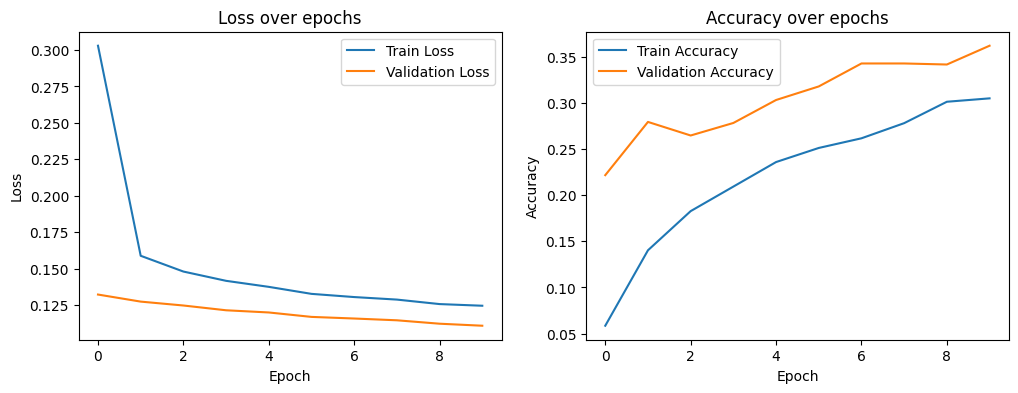

In [13]:
# Charge et entraîne le modèle Word2Vec
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = split_data(X_word2vec, y)
model_word2vec = build_model(X_train_w2v.shape[1], y_train_w2v.shape[1])
history_word2vec = train_model(model_word2vec, X_train_w2v, y_train_w2v, X_test_w2v, y_test_w2v)
loss_word2vec, accuracy_word2vec = evaluate_model(model_word2vec, X_test_w2v, y_test_w2v)
plot_training_history(history_word2vec)

# Enregistre le modèle avec MLflow
with mlflow.start_run(run_name="Word2Vec Model"):
    mlflow.log_param("model", "Word2Vec")
    mlflow.log_metric("loss", loss_word2vec)
    mlflow.log_metric("accuracy", accuracy_word2vec)
    model_word2vec_path = 'model/word2vec_model.keras'
    model_word2vec.save(model_word2vec_path)
    mlflow.log_artifact(model_word2vec_path)


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4678 - loss: 0.0970 - val_accuracy: 0.5215 - val_loss: 0.0838
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4655 - loss: 0.0955 - val_accuracy: 0.5283 - val_loss: 0.0826
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4710 - loss: 0.0934 - val_accuracy: 0.5294 - val_loss: 0.0812
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4862 - loss: 0.0922 - val_accuracy: 0.5351 - val_loss: 0.0801
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4726 - loss: 0.0901 - val_accuracy: 0.5464 - val_loss: 0.0793
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4933 - loss: 0.0887 - val_accuracy: 0.5498 - val_loss: 0.0786
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5011 - loss: 0.0881 - val_accuracy: 0.5611 - val_loss: 0.0776
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 0.0852 - val_accuracy: 0.

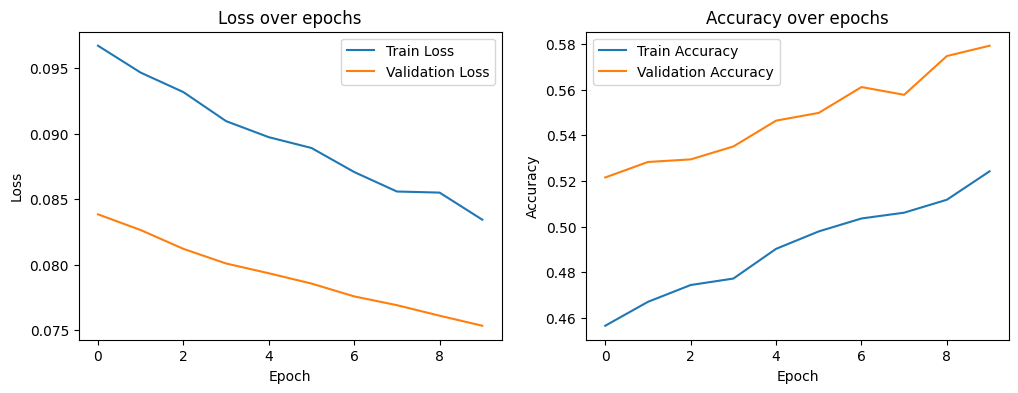

In [14]:
# Charge et entraîne le modèle USE
X_train_use, X_test_use, y_train_use, y_test_use = split_data(X_use_np, y)
use_model = tf.keras.models.load_model("saved_models/use_model.keras")
history_use = train_model(use_model, X_train_use, y_train_use, X_test_use, y_test_use)
loss_use, accuracy_use = evaluate_model(use_model, X_test_use, y_test_use)
plot_training_history(history_use)

# Enregistre le modèle avec MLflow
with mlflow.start_run(run_name="USE Model"):
    mlflow.log_param("model", "USE")
    mlflow.log_metric("loss", loss_use)
    mlflow.log_metric("accuracy", accuracy_use)
    model_use_path = 'model/use_model.keras'
    use_model.save(model_use_path)
    mlflow.log_artifact(model_use_path)


In [15]:
def transform_text_to_bow(text):
    X_bow = vectorizer.transform([text])
    return svd.transform(X_bow)

from gensim.models import Word2Vec
import numpy as np

word2vec_model = Word2Vec.load("./model/word2vec")

def transform_text_to_word2vec(text):
    words = text.split()
    word_vectors = []
    
    for word in words:
        if word in word2vec_model.wv:
            word_vectors.append(word2vec_model.wv[word])
    
    if word_vectors:
        # Moyenne des vecteurs de mots, représentation unique pour la phrase
        return np.mean(word_vectors, axis=0).reshape(1, -1)
    else:
        # Si aucun mot n'est dans le modèle, retourne un vecteur nul
        return np.zeros((1, word2vec_model.vector_size))


def transform_text_to_use(text):
    # Applique USE sur la phrase complète
    return use_layer([text]).numpy()


In [16]:
import tensorflow_hub as hub

# modèle USE depuis TensorFlow Hub
use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False)


## Test

In [17]:
new_question_text = "how to center a div"

# Transformation du texte pour chaque modèle
new_question_vector_bow = transform_text_to_bow(new_question_text)
new_question_vector_w2v = transform_text_to_word2vec(new_question_text)
new_question_vector_use = transform_text_to_use(new_question_text)

# Prédiction pour le modèle BoW+SVD
predicted_tags_bow_svd = model_bow_svd.predict(new_question_vector_bow)
predicted_tags_binary_bow_svd = (predicted_tags_bow_svd > 0.1).astype(int)
predicted_tag_names_bow_svd = [top_tags[i] for i in range(len(predicted_tags_binary_bow_svd[0])) if predicted_tags_binary_bow_svd[0][i] == 1]
print("BoW+SVD Model - Tags suggérés :", predicted_tag_names_bow_svd)

# Prédiction pour le modèle Word2Vec
predicted_tags_w2v = model_word2vec.predict(new_question_vector_w2v)
predicted_tags_binary_w2v = (predicted_tags_w2v > 0.1).astype(int)
predicted_tag_names_w2v = [top_tags[i] for i in range(len(predicted_tags_binary_w2v[0])) if predicted_tags_binary_w2v[0][i] == 1]
print("Word2Vec Model - Tags suggérés :", predicted_tag_names_w2v)

# Prédiction pour le modèle USE
predicted_tags_use = use_model.predict(new_question_vector_use)
predicted_tags_binary_use = (predicted_tags_use > 0.1).astype(int)
predicted_tag_names_use = [top_tags[i] for i in range(len(predicted_tags_binary_use[0])) if predicted_tags_binary_use[0][i] == 1]
print("USE Model - Tags suggérés :", predicted_tag_names_use)

# Affiche le tag avec la probabilité maximale pour chaque modèle
max_prob_index_bow_svd = predicted_tags_bow_svd.argmax()
max_prob_tag_bow_svd = top_tags[max_prob_index_bow_svd]
max_prob_value_bow_svd = predicted_tags_bow_svd[0, max_prob_index_bow_svd]

max_prob_index_w2v = predicted_tags_w2v.argmax()
max_prob_tag_w2v = top_tags[max_prob_index_w2v]
max_prob_value_w2v = predicted_tags_w2v[0, max_prob_index_w2v]

max_prob_index_use = predicted_tags_use.argmax()
max_prob_tag_use = top_tags[max_prob_index_use]
max_prob_value_use = predicted_tags_use[0, max_prob_index_use]

print("BoW+SVD Model - Tag avec la probabilité maximale :", max_prob_tag_bow_svd, "Valeur :", max_prob_value_bow_svd)
print("Word2Vec Model - Tag avec la probabilité maximale :", max_prob_tag_w2v, "Valeur :", max_prob_value_w2v)
print("USE Model - Tag avec la probabilité maximale :", max_prob_tag_use, "Valeur :", max_prob_value_use)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
BoW+SVD Model - Tags suggérés : ['javascript', 'python']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Word2Vec Model - Tags suggérés : ['python', 'android', 'flutter', 'node.js', 'dart', 'docker', 'npm']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
USE Model - Tags suggérés : ['javascript', 'python', 'python-3.x', 'list', 'pandas']
BoW+SVD Model - Tag avec la probabilité maximale : python Valeur : 0.1880194
Word2Vec Model - Tag avec la probabilité maximale : android Valeur : 0.22196461
USE Model - Tag avec la probabilité maximale : python Valeur : 0.66289216
